# Predict the Compressive Strength of Cement Paste as a Function of Microsilica and Nanosilica Contents, Water/Cement Ratio, and Curing Ages

AUTHOR: FOLARIN O.O, OMOLE A.O, ALALADE O.O, OLADAPO A.A

DATE: SEPTEMBER, 2022





***Import basic libraries***

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
data = pd.read_excel("/content/sample_data/Nano.xlsx")#Read the excel file

In [77]:
data.head()#Display the first five rows of the dataset

,No.,W/C (Ratio per mass),Curing time (Days),Nanosillica (NS),Microsilica (MS),Compressive strength(Mpa)
0,1,0.4,3,0,0,15.51
1,2,0.4,3,1.4,0,16.85
2,3,0.4,3,4.2,0,23.60
3,4,0.4,3,2.8,0,21.57
4,5,0.4,3,0,4,18.88


In [78]:
data.drop(columns = ['No.'], inplace=True) #Drop the column No. as it is of no use

In [79]:
data = data[data["Nanosillica (NS)"] != "I"]

In [80]:
data.shape #Display the number of rows and columns of the dataset

(204, 5)

In [81]:
data.describe() #Statistical description of the data in the dataframe

,W/C (Ratio per mass),Curing time (Days),Microsilica (MS),Compressive strength(Mpa)
count,204.000000,204.000000,204.000000,204.000000
mean,0.473137,15.921569,7.745098,34.612304
std,0.093049,13.046477,8.018066,9.467936
min,0.400000,3.000000,0.000000,14.000000
25%,0.400000,7.000000,0.000000,28.195000
50%,0.500000,14.000000,5.000000,34.495000
75%,0.500000,28.000000,13.000000,40.550000
max,0.840000,90.000000,40.000000,66.870000


In [82]:
data["Curing time (Days)"].value_counts() #Display the unique values in the curing time column and their counts

7     50
28    49
3     36
14    34
21    32
90     3
Name: Curing time (Days), dtype: int64

## Data cleaning and formatting

In [83]:
data.drop(data[data['Curing time (Days)'] == 90 ].index, inplace = True) #Remove the rows with 90 days curing time

***Check for null values in the dataframe***

In [84]:
data.isnull().sum() #Returns the number of missing values in each column

W/C (Ratio per mass)         0
Curing time (Days)           0
Nanosillica (NS)             0
Microsilica (MS)             0
Compressive strength(Mpa)    0
dtype: int64

***Data frame information after data cleaning***

In [85]:
data.info() #Get information on each column after cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   W/C (Ratio per mass)       201 non-null    float64
 1   Curing time (Days)         201 non-null    int64  
 2   Nanosillica (NS)           201 non-null    object 
 3   Microsilica (MS)           201 non-null    int64  
 4   Compressive strength(Mpa)  201 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.4+ KB


In [86]:
data.describe()

,W/C (Ratio per mass),Curing time (Days),Microsilica (MS),Compressive strength(Mpa)
count,201.000000,201.000000,201.000000,201.000000
mean,0.471244,14.815920,7.786070,34.359005
std,0.092428,9.445684,8.070874,9.304096
min,0.400000,3.000000,0.000000,14.000000
25%,0.400000,7.000000,0.000000,28.060000
50%,0.500000,14.000000,5.000000,34.380000
75%,0.500000,21.000000,13.000000,40.410000
max,0.840000,28.000000,40.000000,66.870000


# ***Exploratory Data Analysis***

***Graphical representation of correlation matrix using heatmap***

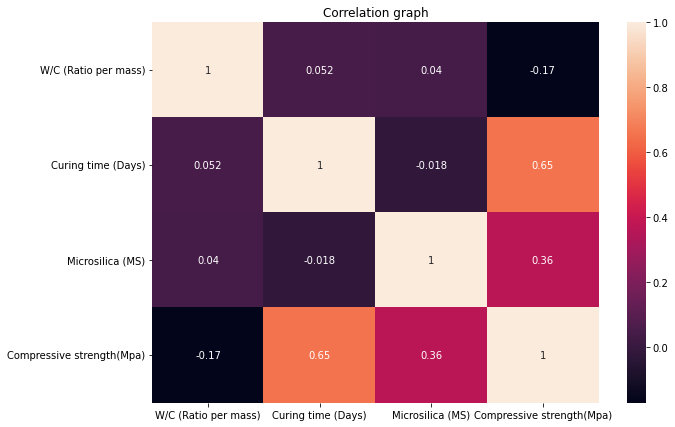

In [87]:
plt.figure(figsize=(10,7))#Create a figure
data_corr = data.corr()
sns.heatmap(data_corr, annot=True) #Heatmap showing the correlation between each column
plt.title("Correlation graph");#Set a title

In [88]:
data.columns = data.columns #Create a list for the column names

In [89]:
data.head(2) #Display the first two columns

,W/C (Ratio per mass),Curing time (Days),Nanosillica (NS),Microsilica (MS),Compressive strength(Mpa)
0,0.4,3,0,0,15.51
1,0.4,3,1.4,0,16.85


In [90]:
data['Curing time (Days)'].value_counts(sort =False) #Get the unique curing times and their respective counts

3     36
7     50
14    34
21    32
28    49
Name: Curing time (Days), dtype: int64

# ***Model prediction using diffrent machine learning algorithm***

***Selecting the feature and target variable***

In [91]:
X = data.drop('Compressive strength(Mpa)', axis=1) #include all columns except compressive strength in the feature dataset
y = data['Compressive strength(Mpa)'] #Target variable

***Splitting the dataset into test(20%) and train(80%)***

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=X["Curing time (Days)"])

In [93]:
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X, y, test_size=0.20, random_state=0)

***Standardizing the data***

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #Create a standard scaler object
X_train = sc.fit_transform(X_train) #Fit and transform X train
X_test = sc.transform(X_test) #Only transform X test

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainn = scaler.fit_transform(X_trainn)
X_testt = scaler.transform(X_testt)

***importing the model prediction libaries***

In [96]:
# !pip install catboost

In [97]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

***Determining the best value for k in KNearest Neighbor***

Text(0.5, 1.0, 'K-value Vs Mean error')

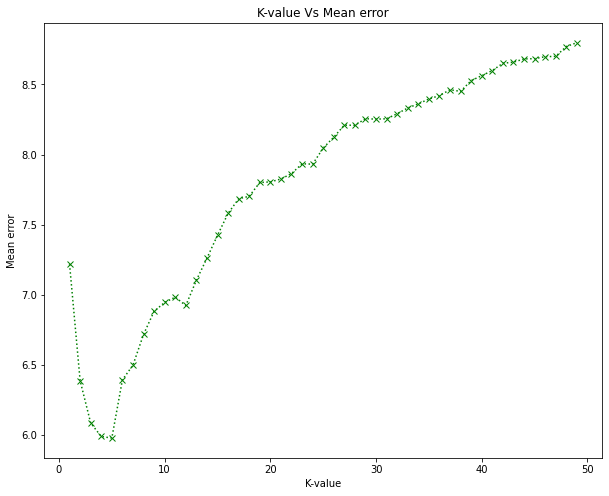

In [98]:
error = []#Create an empty list
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error #for model evaluation
import matplotlib.pyplot as plt #for visualizing the errors against the values of k

for i in range(1,50):
    kn = KNeighborsRegressor(n_neighbors = i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    err = sqrt(mean_squared_error(y_test, pred_i)) 
    error.append(err) #Append the error to the empty error list created above

plt.figure(figsize = (10,8)) #Create a figure
plt.plot(range(1,50), error, color='green', linestyle='dotted', marker='x', markerfacecolor='black')
plt.xlabel("K-value") #number of neighbors
plt.ylabel("Mean error") #Mean error for each number of neighbors
plt.title("K-value Vs Mean error") #Set a title


***Determining the mean squared error, mean absolute error, and R squared score for our trained model***

In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt



def evaluation(trained_model):
    """
    This function calcullates the
    mean squared error, mean absolute error,
    and R2 score for the model

    Returns:
    A dictionary of the evaluation metrics
    """
    v_pred = trained_model.predict(X_test) #Model predicts x test
    rmse = sqrt(mean_squared_error(y_test, v_pred))
    mae = mean_absolute_error(y_test, v_pred)
    r2 = r2_score(y_test, v_pred)
    result = {'RMSE (MPa)': rmse, 'MAE (MPa)':mae, 'R2_score':r2}
    return result

def evaluationn(trained_model):
    v_predd = trained_model.predict(X_testt)
    rmse = sqrt(mean_squared_error(y_testt, v_predd))
    mae = mean_absolute_error(y_testt, v_predd)
    r2 = r2_score(y_testt, v_predd)
    result = {'RMSE (MPa)': rmse, 'MAE (MPa)':mae, 'R2_score':r2}
    return result

***Training the model***

## The models used were:
 - KNeighbors Regressor
 - Random Forest Regressor
 - CatBoost Regressor
 - XGB Regressor

In [100]:
KNN_m = KNeighborsRegressor(n_neighbors = 5)
RFR_m = RandomForestRegressor(n_estimators= 1000, random_state=0, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 50, bootstrap=True)
CB_m = CatBoostRegressor(depth=2, iterations=2000, learning_rate=0.5)
XGB_m = XGBRegressor(n_estimators=1000, max_depth=2, eta=0.5, subsample=0.5, colsample_bytree=1.0)

#Training the individual models
KNN_fit = KNN_m.fit(X_trainn, y_trainn)
RFR_fit = RFR_m.fit(X_trainn, y_trainn)
CB_fit = CB_m.fit(X_train, y_train)
XGB_fit = XGB_m.fit(X_trainn, y_trainn)

0:	learn: 7.3007962	total: 236us	remaining: 472ms
1:	learn: 6.8400445	total: 1.21ms	remaining: 1.21s
2:	learn: 6.0970871	total: 1.64ms	remaining: 1.09s
3:	learn: 5.6339135	total: 2.04ms	remaining: 1.02s
4:	learn: 5.2090629	total: 2.45ms	remaining: 978ms
5:	learn: 4.9639668	total: 2.85ms	remaining: 947ms
6:	learn: 4.6475973	total: 3.23ms	remaining: 921ms
7:	learn: 4.5378259	total: 3.61ms	remaining: 900ms
8:	learn: 4.4150203	total: 4.03ms	remaining: 891ms
9:	learn: 4.3353812	total: 4.41ms	remaining: 878ms
10:	learn: 4.2936525	total: 4.81ms	remaining: 870ms
11:	learn: 4.2302057	total: 5.21ms	remaining: 863ms
12:	learn: 4.1709556	total: 5.61ms	remaining: 857ms
13:	learn: 4.0328860	total: 6.26ms	remaining: 889ms
14:	learn: 3.9519208	total: 6.95ms	remaining: 920ms
15:	learn: 3.9258831	total: 7.49ms	remaining: 928ms
16:	learn: 3.8749360	total: 8.07ms	remaining: 942ms
17:	learn: 3.8086371	total: 8.5ms	remaining: 936ms
18:	learn: 3.7916123	total: 9.17ms	remaining: 956ms
19:	learn: 3.7844181	tot

In [101]:
results = {'KNearest Neighbor': evaluationn(KNN_fit),
           'Random Forest': evaluationn(RFR_fit),
           'CatBoost': evaluation(CB_fit),
           'XBGoost': evaluationn(XGB_fit)
          }
results_df = pd.DataFrame(results)

***Results obtained***

In [102]:
results_df #Resulting metrics in a dataframe

,KNearest Neighbor,Random Forest,CatBoost,XBGoost
RMSE (MPa),4.679212,4.429656,3.030740,3.851393
MAE (MPa),3.604829,3.263484,2.205152,2.485118
R2_score,0.710226,0.740311,0.926653,0.803687


***Transpose of results obtained***

In [103]:
res = results_df.copy()
t_res = res.T #Transpose the result dataframe
t_res

,RMSE (MPa),MAE (MPa),R2_score
KNearest Neighbor,4.679212,3.604829,0.710226
Random Forest,4.429656,3.263484,0.740311
CatBoost,3.030740,2.205152,0.926653
XBGoost,3.851393,2.485118,0.803687


***Comparing the root mean squared error for the models using data visualization***

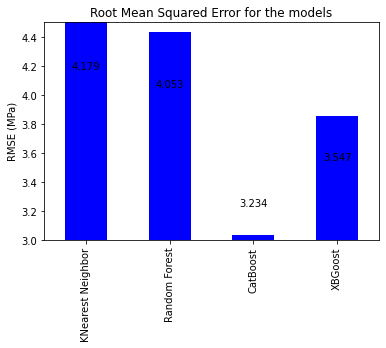

In [104]:
plt.ylim(3.0,4.5)
Models = ['KNN', 'Random Forest', 'CatBoost', 'XGBoost']

(t_res['RMSE (MPa)']).plot(kind='bar', color='blue') #Plotting the RMSE of each model
plt.title("Root Mean Squared Error for the models")
plt.ylabel("RMSE (MPa)");
rmse = [4.179, 4.053, 3.234, 3.547]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(Models, rmse)


***Comparing the mean absolute error for the models using data visualization***

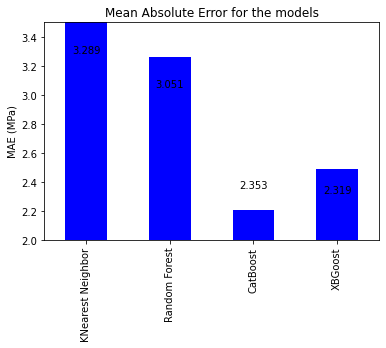

In [105]:
plt.ylim(2.0,3.5)
Models = ['KNN', 'Random Forest', 'CatBoost', 'XGBoost']

(t_res['MAE (MPa)']).plot(kind='bar', color='blue')
plt.title("Mean Absolute Error for the models")
plt.ylabel("MAE (MPa)");
mae = [3.289, 3.051, 2.353, 2.319]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(Models, mae)

***Comparing the R squared scores for the models using data visualization***

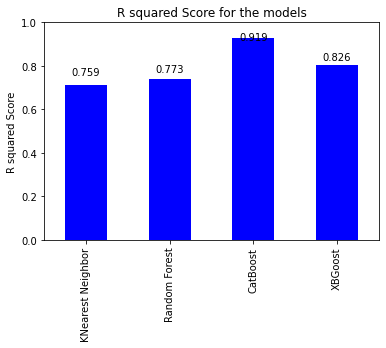

In [106]:
plt.ylim(0,1.0)
Models = ['KNN', 'Random Forest', 'CatBoost', 'XGBoost']

(t_res['R2_score']).plot(kind='bar', color='blue')
plt.title("R squared Score for the models")
plt.ylabel("R squared Score");
R2 = [0.759, 0.773, 0.919, 0.826]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

addlabels(Models, R2)

The catboost model products the highest R squared score of 0.919

***Selecting our best model***

In [107]:
final_model = CatBoostRegressor(depth=2, iterations=2000, learning_rate=0.5)
final_model.fit(sc.fit_transform(X), y)

0:	learn: 7.7000095	total: 336us	remaining: 674ms
1:	learn: 7.1345777	total: 1.06ms	remaining: 1.06s
2:	learn: 6.3675027	total: 1.18ms	remaining: 788ms
3:	learn: 5.7827900	total: 1.29ms	remaining: 644ms
4:	learn: 5.2990872	total: 1.4ms	remaining: 559ms
5:	learn: 5.0595243	total: 1.51ms	remaining: 501ms
6:	learn: 4.8437503	total: 1.61ms	remaining: 460ms
7:	learn: 4.6208674	total: 1.73ms	remaining: 430ms
8:	learn: 4.4820926	total: 2.56ms	remaining: 567ms
9:	learn: 4.2697806	total: 2.67ms	remaining: 532ms
10:	learn: 4.2063076	total: 2.78ms	remaining: 503ms
11:	learn: 4.1239573	total: 2.89ms	remaining: 479ms
12:	learn: 4.1019635	total: 3ms	remaining: 458ms
13:	learn: 4.0308549	total: 3.08ms	remaining: 437ms
14:	learn: 3.9925747	total: 3.49ms	remaining: 462ms
15:	learn: 3.9534639	total: 3.91ms	remaining: 485ms
16:	learn: 3.9238214	total: 4.3ms	remaining: 502ms
17:	learn: 3.9098468	total: 4.72ms	remaining: 520ms
18:	learn: 3.8513184	total: 5.12ms	remaining: 533ms
19:	learn: 3.7020313	total: 

***Saving model as pickle file***

In [108]:
import joblib

filename = "Model.pkl"
with open (filename, "wb") as file:
    joblib.dump(final_model, file)

In [109]:
from google.colab import files

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>